# Dream Challenge Model Prototye

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch

In [ ]:
import synapseclient 
import synapseutils 

syn = synapseclient.Synapse() 
syn.login('yztxwd@gmail.com','9zqqW9Jy5QhRFeS') 
synapseutils.syncFromSynapse(syn, 'syn30026233', './data/')
synapseutils.syncFromSynapse(syn, 'syn28469146', './data/')

In [3]:
train_dataset = pd.read_table("./data/train_sequences.txt", header=None, sep="\t")

## Save dataset 

In [81]:
from sklearn.model_selection import train_test_split

df_full = pd.read_table('./data/train_sequences.txt', header=None, names=['seq', 'target'], dtype={'seq':str, 'target':np.float32})
df_train, df_remain = train_test_split(df_full, test_size=0.2, random_state=1)
df_val, df_test = train_test_split(df_remain, test_size=0.5, random_state=1)

In [82]:
dataset_train = DreamChallengeDataset(df_train.reset_index(), transform=DNA2OneHot())
dataset_val = DreamChallengeDataset(df_val.reset_index(), transform=DNA2OneHot())
dataset_test = DreamChallengeDataset(df_test.reset_index(), transform=DNA2OneHot())

### TFRecord

In [ ]:
import tfrecord

def get_data_TFRecord_worker(dataset, outprefix):

    TFRecord_file = outprefix + ".TFRecord"
    writer = tfrecord.TFRecordWriter(TFRecord_file)
    count = 0
    for idx, (seq, target) in enumerate(dataset):
        writer.write({'seq': (list(seq.flatten()), 'float'),
                        'target': (target[0], 'float')})
        count += 1
        if count % 100000 == 0: print(f"{count} written")
    writer.close()

In [ ]:
#get_data_TFRecord_worker(dataset_train, "train")
#get_data_TFRecord_worker(dataset_val, "val")
#get_data_TFRecord_worker(dataset_test, "test")

### webdataset

In [8]:
import webdataset as wds

In [84]:
dataset_train = DreamChallengeDataset(df_train.reset_index(), transform=DNA2OneHot())
dataset_val = DreamChallengeDataset(df_val.reset_index(), transform=DNA2OneHot())
dataset_test = DreamChallengeDataset(df_test.reset_index(), transform=DNA2OneHot())

In [7]:
def writeWDS(dataset, prefix):
    sink = wds.ShardWriter("shards/" + prefix + "-%02d.tar", maxcount=10000)
    count = 0
    for idx, (seq, target) in enumerate(dataset):
        sink.write({
            '__key__': 'sample%06d' % idx,
            'seq.npy': seq,
            'target.npy': target
        })
        count += 1
        if count % 100000 == 0: print(f"{count} written")
    sink.close()

In [86]:
writeWDS(dataset_train, "train")

# writing shards/train-00.tar 0 0.0 GB 0
# writing shards/train-01.tar 10000 0.0 GB 10000
# writing shards/train-02.tar 10000 0.0 GB 20000
# writing shards/train-03.tar 10000 0.0 GB 30000
# writing shards/train-04.tar 10000 0.0 GB 40000
# writing shards/train-05.tar 10000 0.0 GB 50000
# writing shards/train-06.tar 10000 0.0 GB 60000
# writing shards/train-07.tar 10000 0.0 GB 70000
# writing shards/train-08.tar 10000 0.0 GB 80000
# writing shards/train-09.tar 10000 0.0 GB 90000
100000 written
# writing shards/train-10.tar 10000 0.0 GB 100000
# writing shards/train-11.tar 10000 0.0 GB 110000
# writing shards/train-12.tar 10000 0.0 GB 120000
# writing shards/train-13.tar 10000 0.0 GB 130000
# writing shards/train-14.tar 10000 0.0 GB 140000
# writing shards/train-15.tar 10000 0.0 GB 150000
# writing shards/train-16.tar 10000 0.0 GB 160000
# writing shards/train-17.tar 10000 0.0 GB 170000
# writing shards/train-18.tar 10000 0.0 GB 180000
# writing shards/train-19.tar 10000 0.0 GB 190000
200

In [87]:
writeWDS(dataset_val, "val")

# writing shards/val-00.tar 0 0.0 GB 0
# writing shards/val-01.tar 10000 0.0 GB 10000
# writing shards/val-02.tar 10000 0.0 GB 20000
# writing shards/val-03.tar 10000 0.0 GB 30000
# writing shards/val-04.tar 10000 0.0 GB 40000
# writing shards/val-05.tar 10000 0.0 GB 50000
# writing shards/val-06.tar 10000 0.0 GB 60000
# writing shards/val-07.tar 10000 0.0 GB 70000
# writing shards/val-08.tar 10000 0.0 GB 80000
# writing shards/val-09.tar 10000 0.0 GB 90000
100000 written
# writing shards/val-10.tar 10000 0.0 GB 100000
# writing shards/val-11.tar 10000 0.0 GB 110000
# writing shards/val-12.tar 10000 0.0 GB 120000
# writing shards/val-13.tar 10000 0.0 GB 130000
# writing shards/val-14.tar 10000 0.0 GB 140000
# writing shards/val-15.tar 10000 0.0 GB 150000
# writing shards/val-16.tar 10000 0.0 GB 160000
# writing shards/val-17.tar 10000 0.0 GB 170000
# writing shards/val-18.tar 10000 0.0 GB 180000
# writing shards/val-19.tar 10000 0.0 GB 190000
200000 written
# writing shards/val-20.tar 

In [88]:
writeWDS(dataset_test, "test")

# writing shards/test-00.tar 0 0.0 GB 0
# writing shards/test-01.tar 10000 0.0 GB 10000
# writing shards/test-02.tar 10000 0.0 GB 20000
# writing shards/test-03.tar 10000 0.0 GB 30000
# writing shards/test-04.tar 10000 0.0 GB 40000
# writing shards/test-05.tar 10000 0.0 GB 50000
# writing shards/test-06.tar 10000 0.0 GB 60000
# writing shards/test-07.tar 10000 0.0 GB 70000
# writing shards/test-08.tar 10000 0.0 GB 80000
# writing shards/test-09.tar 10000 0.0 GB 90000
100000 written
# writing shards/test-10.tar 10000 0.0 GB 100000
# writing shards/test-11.tar 10000 0.0 GB 110000
# writing shards/test-12.tar 10000 0.0 GB 120000
# writing shards/test-13.tar 10000 0.0 GB 130000
# writing shards/test-14.tar 10000 0.0 GB 140000
# writing shards/test-15.tar 10000 0.0 GB 150000
# writing shards/test-16.tar 10000 0.0 GB 160000
# writing shards/test-17.tar 10000 0.0 GB 170000
# writing shards/test-18.tar 10000 0.0 GB 180000
# writing shards/test-19.tar 10000 0.0 GB 190000
200000 written
# writin

In [5]:
df_predict = pd.read_table("./data/test_sequences.txt", header=None, names=['seq', 'target'], dtype={'seq':str, 'target':np.float32})
dataset_predict = DreamChallengeDataset(df_predict, transform=DNA2OneHot())

In [10]:
writeWDS(dataset_predict, "pred")

# writing shards/pred-00.tar 0 0.0 GB 0
# writing shards/pred-01.tar 10000 0.0 GB 10000
# writing shards/pred-02.tar 10000 0.0 GB 20000
# writing shards/pred-03.tar 10000 0.0 GB 30000
# writing shards/pred-04.tar 10000 0.0 GB 40000
# writing shards/pred-05.tar 10000 0.0 GB 50000
# writing shards/pred-06.tar 10000 0.0 GB 60000
# writing shards/pred-07.tar 10000 0.0 GB 70000


## DataLoader

In [4]:
%%writefile dataloader.py

# lightning data module
import os
import io
import numpy as np
import pandas as pd

import torch
from torch.utils.data import Dataset
import pytorch_lightning as pl
from pytorch_lightning.utilities import cli as pl_cli
from torch.utils.data import random_split, DataLoader
import torch_xla.core.xla_model as xm

import webdataset as wds

class DNA2OneHot(object):
    def __init__(self, expect_len=110, rev=False):
        self.expect_len = expect_len
        self.rev = rev
        self.DNA2Index = {
            "A": 0,
            "C": 1,
            "G": 2,
            "T": 3
        }
    
    def __call__(self, dnaSeq):
        # initialize the matrix as 4 x self.expect_len
        seqMatrixs = np.zeros((4, self.expect_len), dtype=np.float32)
        # change the value to matrix
        seqLen = len(dnaSeq)
        dnaSeq = self.rev_comp(dnaSeq.upper()) if self.rev else dnaSeq.upper()
        for j in range(0, min(seqLen, self.expect_len)):
            try:
                seqMatrixs[self.DNA2Index[dnaSeq[j]], j] = 1
            except KeyError as e:
                continue
        return seqMatrixs

class DreamChallengeDataset(Dataset):
    def __init__(self, df=None, transform=None, target_transform=None):
        self.seq = df.seq
        self.target = df.target
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        return len(self.seq)
    
    def __getitem__(self, idx):
        seq = self.seq.iloc[idx]
        target = self.target.iloc[idx][np.newaxis]
        if self.transform:
            seq = self.transform(seq)
        if self.target_transform:
            target = self.target_transform(target)
        return seq, target

    def rev_comp(self, inp_str):
        rc_dict = {'A': 'T', 'G': 'C', 'T': 'A', 'C': 'G', 'c': 'g',
                   'g': 'c', 't': 'a', 'a': 't', 'n': 'n', 'N': 'N'}
        outp_str = list()
        for nucl in inp_str:
            outp_str.append(rc_dict[nucl])
        return ''.join(outp_str)[::-1]    

def npy_decoder(key, value):
    if not key.endswith(".npy"):
        return None
    assert isinstance(value, bytes)
    return np.load(io.BytesIO(value))

def worker_splitter(urls):
    urls = [url for url in urls]
    assert isinstance(urls, list)

    worker_info = torch.utils.data.get_worker_info()
    if worker_info is not None:
        wid = worker_info.id
        num_workers = worker_info.num_workers

        return iter(urls[wid::num_workers])
    else:
        return iter(urls)

def node_splitter(urls):
    urls = [url for url in urls]

    rank = xm.get_ordinal()
    num_replicas = xm.xrt_world_size()

    urls_this = urls[rank::num_replicas]

    return iter(urls_this)

@pl_cli.DATAMODULE_REGISTRY
class DreamChallengeDataModule(pl.LightningDataModule):
    def __init__(self, data_dir: str="./shards/", batch_size=512, num_workers=6):
        super().__init__()
        self.data_dir = data_dir
        self.transform = DNA2OneHot()
        self.batch_size = batch_size
        self.num_workers = num_workers

        self.description = {"seq": "float", "target": "float"}

        self.dataset_train = None
        self.dataset_val = None
        self.dataset_test = None
        self.dataset_predict = None
    
    def prepare_data(self):
        # Assume data already in self.data_dir
        pass

    def setup(self, stage=None):
        # Assign train/val datasets for use in dataloaders
        if stage == "fit" or stage is None:
            num_data_instances = xm.xrt_world_size() * self.num_workers
            print(f"Device {xm.get_ordinal()} in world size of {xm.xrt_world_size()}")

            self.dataset_train = wds.DataPipeline(
                wds.ResampledShards("shards/train-{00..539}.tar"),
                #node_splitter,
                worker_splitter,
                wds.tarfile_to_samples(),
                wds.decode(npy_decoder),
                wds.to_tuple("seq.npy", "target.npy"),
                wds.batched(self.batch_size, partial=False)
                ).with_epoch(5391406//num_data_instances//self.batch_size)

            self.dataset_val = wds.DataPipeline(
                wds.SimpleShardList("shards/val-{00..67}.tar"),
                node_splitter,
                worker_splitter,
                wds.tarfile_to_samples(),
                wds.decode(npy_decoder),
                wds.to_tuple("seq.npy", "target.npy"),
                wds.batched(self.batch_size, partial=False)
                )
            #.with_length(673926//num_data_instances)

            self.dataset_val = wds.DataPipeline(
                wds.SimpleShardList("shards/test-{00..67}.tar"),
                node_splitter,
                worker_splitter,
                wds.tarfile_to_samples(),
                wds.decode(npy_decoder),
                wds.to_tuple("seq.npy", "target.npy"),
                wds.batched(self.batch_size, partial=False)
                )
            #.with_length(673926)

            self.dataset_pred = wds.DataPipeline(
                wds.SimpleShardList("shards/pred-{00-07}.tar"),
                wds.tarfile_to_samples(),
                wds.decode(npy_decoder),
                wds.to_tuple("seq.npy", "target.npy"),
                wds.batched(self.batch_size, partial=False)
            )
        
    def train_dataloader(self):
        return DataLoader(self.dataset_train, num_workers=self.num_workers)

    def val_dataloader(self):
        return DataLoader(self.dataset_val, num_workers=self.num_workers)
        
    def test_dataloader(self):
        return DataLoader(self.dataset_test, num_workers=self.num_workers)
    
    def pred_dataloader(self):
        return DataLoader(self.dataset_predict)


/home/jmy5455/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-06-21 02:56:24.848661: E tensorflow/core/framework/op_kernel.cc:1676] OpKernel ('op: "TPURoundRobin" device_type: "CPU"') for unknown op: TPURoundRobin
2022-06-21 02:56:24.848768: E tensorflow/core/framework/op_kernel.cc:1676] OpKernel ('op: "TpuHandleToProtoKey" device_type: "CPU"') for unknown op: TpuHandleToProtoKey
Traceback (most recent call last):
  File "/home/jmy5455/.local/lib/python3.8/site-packages/pytorch_lightning/utilities/xla_device.py", line 32, in inner_f
    queue.put(func(*args, **kwargs))
  File "/home/jmy5455/.local/lib/python3.8/site-packages/pytorch_lightning/utilities/xla_device.py", line 73, in _is_device_tpu
    return (xm.xrt_world_size() > 1) or bool(xm.get_xla_supported_devices("TPU"))
  File "/usr/loca

In [66]:
for i in wds.WebLoader(dataset, batch_size=4): break

In [72]:
i[0].shape

torch.Size([4, 3, 4, 110])

## Check target distribution

In [20]:
ds = DreamChallengeDataModule(transform=DNA2OneHot())
ds.setup()

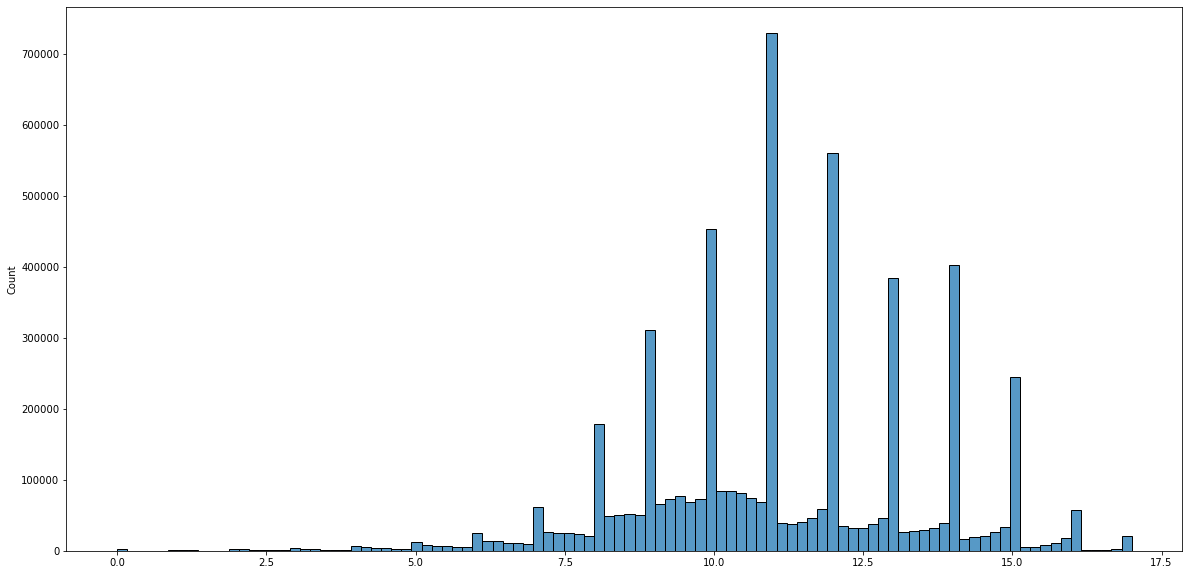

In [35]:
# train
ds_train = ds.train_dataloader()
targets = []
for seq, target in ds_train:
    targets.append(target)
targets = torch.cat(targets)
# plot histogram on targets
targets.numpy()
fig = plt.figure(figsize=(20, 10))
ax = sns.histplot(x=targets, bins=100)

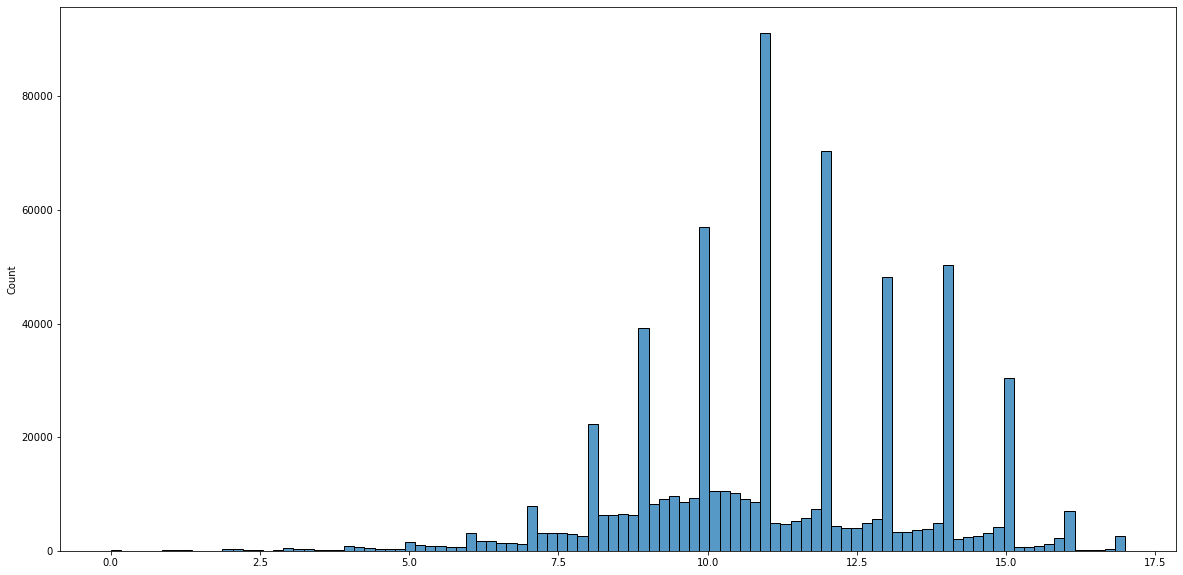

In [36]:
# val
ds_val = ds.val_dataloader()
targets = []
for seq, target in ds_val:
    targets.append(target)
targets = torch.cat(targets)
# plot histogram on targets
targets.numpy()
fig = plt.figure(figsize=(20, 10))
ax = sns.histplot(x=targets, bins=100)

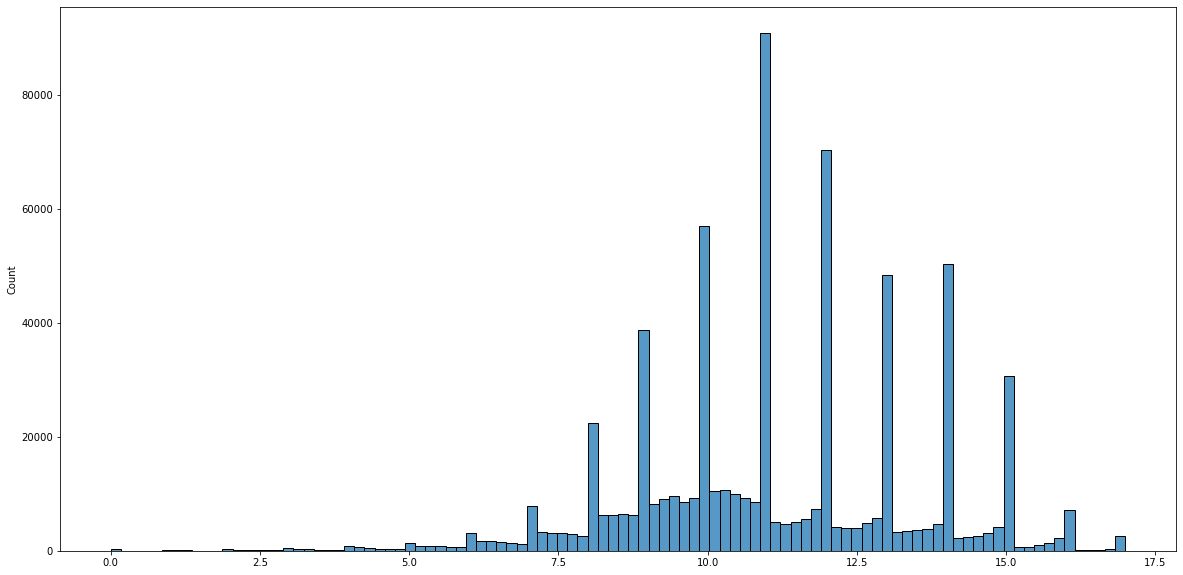

In [37]:
# test
ds_test = ds.test_dataloader()
targets = []
for seq, target in ds_test:
    targets.append(target)
targets = torch.cat(targets)
# plot histogram on targets
targets.numpy()
fig = plt.figure(figsize=(20, 10))
ax = sns.histplot(x=targets, bins=100)

## Lightning training script

In [2]:
%%writefile lightning_dreamchallenge.py

import numpy as np
from collections import OrderedDict

import torch
import torch.nn.functional as F
from torch import nn
from pytorch_lightning.utilities.cli import LightningCLI
from pytorch_lightning.utilities import cli as pl_cli
import pytorch_lightning as pl

from dataloader import DreamChallengeDataModule

class Flatten(nn.Module):
    def forward(self, x):
        return torch.flatten(x, start_dim=1)

class NNHooks(pl.LightningModule):
    def __init__(self):
        super().__init__()

    def training_step(self, batch, batch_idx):
        seq, y = batch
        y_hat = self(seq)

        # compute loss
        loss = F.mse_loss(y_hat, y)
        self.log('train_loss', loss)
        return {'loss': loss}
    
    def validation_step(self, batch, batch_idx):
        seq, y = batch
        y_hat = self(seq)

        # compute loss
        val_loss = F.mse_loss(y_hat, y)
        self.log('val_loss', val_loss)
        return {'val_loss': val_loss}

    def test_step(self, batch, batch_idx):
        seq, y = batch
        y_hat = self(seq)

        # compute loss
        test_loss = F.mse_loss(y_hat, y)
        self.log('test_loss', test_loss)
        return {'test_loss': test_loss}

@pl_cli.MODEL_REGISTRY
class ConvolutionalModel(NNHooks):
    def __init__(self):
        super().__init__()

        self.model_strand_specific_forward = nn.Sequential(OrderedDict([
            ('conv1', nn.Conv1d(4, 256, 31, padding=15)),
            ('relu1', nn.ReLU()),
            ('conv2', nn.Conv1d(256, 256, 31, padding=15)),
            ('relu2', nn.ReLU())
        ]))
        self.model_strand_specific_reverse = nn.Sequential(OrderedDict([
            ('conv1', nn.Conv1d(4, 256, 31, padding=15)),
            ('relu1', nn.ReLU()),
            ('conv2', nn.Conv1d(256, 256, 31, padding=15)),
            ('relu2', nn.ReLU())
        ]))
        self.model_body = nn.Sequential(OrderedDict([
            ('conv3', nn.Conv1d(512, 256, 31, padding=15)),
            ('relu3', nn.ReLU()),
            ('conv4', nn.Conv1d(256, 256, 31, padding=15)),
            ('relu4', nn.ReLU()),
            ('faltten', Flatten()),
            ('dense1', nn.Linear(110*256, 256)),
            ('relu5', nn.ReLU()),
            ('dropout1', nn.Dropout(0.2)),
            ('dense2', nn.Linear(256, 256)),
            ('relu6', nn.ReLU()),
            ('dropout1', nn.Dropout(0.2))
        ]))
        self.model_head = nn.Sequential(OrderedDict([
            ('dense_head', nn.Linear(256, 1))
        ]))

    def forward(self, seq):
        seq_revcomp = torch.flip(seq.detach().clone(), [1, 2])
        y_hat_for = self.model_strand_specific_forward(seq)
        y_hat_rev = self.model_strand_specific_reverse(seq_revcomp)
        y_hat = torch.cat([y_hat_for, y_hat_rev], dim=1)
        y_hat = self.model_body(y_hat)
        y_hat = self.model_head(y_hat)

        return y_hat

class MyLightningCLI(LightningCLI):
    def add_arguments_to_parser(self, parser):
        parser.add_optimizer_args(torch.optim.Adam)

    def after_fit(self):
        self.trainer.test(ckpt_path='best')

def main():
    cli = MyLightningCLI(auto_registry=True, save_config_overwrite=True)

if __name__ == '__main__':
    main()

Overwriting lightning_dreamchallenge.py


In [23]:
%%writefile native_pytorch.py

import sys
import yaml
from collections import OrderedDict

import torch
import torch_xla
import torch_xla.core.xla_model as xm
from torch import nn
import torchmetrics

from dataloader import DreamChallengeDataModule
from tqdm import tqdm

class ConvolutionalModel(nn.Module):
    def __init__(self):
        super(ConvolutionalModel, self).__init__()

        self.model_strand_specific_forward = nn.Sequential(OrderedDict([
            ('conv1', nn.Conv1d(4, 256, 31, padding=15)),
            ('relu1', nn.ReLU()),
            ('conv2', nn.Conv1d(256, 256, 31, padding=15)),
            ('relu2', nn.ReLU())
        ]))
        self.model_strand_specific_reverse = nn.Sequential(OrderedDict([
            ('conv1', nn.Conv1d(4, 256, 31, padding=15)),
            ('relu1', nn.ReLU()),
            ('conv2', nn.Conv1d(256, 256, 31, padding=15)),
            ('relu2', nn.ReLU())
        ]))
        self.model_body = nn.Sequential(OrderedDict([
            ('conv3', nn.Conv1d(512, 256, 31, padding=15)),
            ('relu3', nn.ReLU()),
            ('conv4', nn.Conv1d(256, 256, 31, padding=15)),
            ('relu4', nn.ReLU()),
            ('faltten', nn.Flatten()),
            ('dense1', nn.Linear(110*256, 256)),
            ('relu5', nn.ReLU()),
            ('dropout1', nn.Dropout(0.2)),
            ('dense2', nn.Linear(256, 256)),
            ('relu6', nn.ReLU()),
            ('dropout1', nn.Dropout(0.2))
        ]))
        self.model_head = nn.Sequential(OrderedDict([
            ('dense_head', nn.Linear(256, 1))
        ]))

    def forward(self, seq):
        seq_revcomp = torch.flip(seq.detach().clone(), [1, 2])
        y_hat_for = self.model_strand_specific_forward(seq)
        y_hat_rev = self.model_strand_specific_reverse(seq_revcomp)
        y_hat = torch.cat([y_hat_for, y_hat_rev], dim=1)
        y_hat = self.model_body(y_hat)
        y_hat = self.model_head(y_hat)

        return y_hat

def train_loop(dataloader, model, loss_fn, optimizer, device):
    model = model.to(device)

    num_batches = len(dataloader)
    pbar = tqdm(enumerate(dataloader))
    for batch, (X, y) in pbar:
        X = X.to(device)
        y = y.to(device)

        # compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        xm.mark_step()

        pbar.set_description(f"Training loss: {loss:>7f}  [{batch:>5d}/{num_batches:>5d}]")

def test_loop(dataloader, model, loss_fn, device):
    model = model.to(device)

    metric = torchmetrics.MeanSquaredError()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            mse = metric(pred, y)

    mse = metric.compute()
    print(f"MSE on all data: {mse}") 

def main():
    # load config
    config = yaml.safe_load(open(sys.argv[1], "r"))

    device = xm.xla_device()
    print(f"XLA device: {device}")

    model = ConvolutionalModel()
    loss_fn = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=config["optimizer"]["lr"])

    datamodule = DreamChallengeDataModule(batch_size=config["data"]["init_args"]["batch_size"], num_workers=config["data"]["init_args"]["num_workers"])
    datamodule.setup()

    epochs = 3
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------")
        train_loop(datamodule.train_dataloader(), model.train(), loss_fn, optimizer, device)
        test_loop(datamodule.val_dataloader(), model.eval(), loss_fn, device)
    print("Done!")

if __name__ == '__main__':
    main()


Overwriting native_pytorch.py


In [3]:
%%writefile args_parse.py

# This module cannot import any other PyTorch/XLA module. Only Python core modules.
import argparse
import os
import sys


def parse_common_options(datadir=None,
                         logdir=None,
                         num_cores=None,
                         batch_size=128,
                         num_epochs=10,
                         num_workers=2,
                         log_steps=20,
                         lr=None,
                         momentum=None,
                         target_accuracy=None,
                         profiler_port=9012,
                         opts=None):
  parser = argparse.ArgumentParser(add_help=True)
  parser.add_argument('--datadir', type=str, default=datadir)
  parser.add_argument('--logdir', type=str, default=logdir)
  parser.add_argument('--num_cores', type=int, default=num_cores)
  parser.add_argument('--batch_size', type=int, default=batch_size)
  parser.add_argument('--num_epochs', type=int, default=num_epochs)
  parser.add_argument('--num_workers', type=int, default=num_workers)
  parser.add_argument('--log_steps', type=int, default=log_steps)
  parser.add_argument('--profiler_port', type=int, default=profiler_port)
  parser.add_argument('--lr', type=float, default=lr)
  parser.add_argument('--momentum', type=float, default=momentum)
  parser.add_argument('--target_accuracy', type=float, default=target_accuracy)
  parser.add_argument('--drop_last', action='store_true')
  parser.add_argument('--fake_data', action='store_true')
  parser.add_argument('--tidy', action='store_true')
  parser.add_argument('--metrics_debug', action='store_true')
  parser.add_argument('--async_closures', action='store_true')
  if opts:
    for name, aopts in opts:
      parser.add_argument(name, **aopts)
  args, leftovers = parser.parse_known_args()
  sys.argv = [sys.argv[0]] + leftovers
  # Setup import folders.
  xla_folder = os.path.dirname(os.path.dirname(os.path.abspath(sys.argv[0])))
  sys.path.append(os.path.join(os.path.dirname(xla_folder), 'test'))
  return args

Overwriting args_parse.py


In [1]:
%%writefile tpu_ddp.py

import args_parse

FLAGS = args_parse.parse_common_options(
    log_steps=200,
    datadir='./shards/',
    logdir='./conv_model/',
    batch_size=512,
    momentum=0.5,
    lr=0.001,
    num_epochs=2,
    num_workers=32)

import os
import shutil
import sys
from collections import OrderedDict
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import torch_xla
import torch_xla.debug.metrics as met
import torch_xla.distributed.parallel_loader as pl
import torch_xla.utils.utils as xu
import torch_xla.core.xla_model as xm
import torch_xla.distributed.xla_multiprocessing as xmp
import torch_xla.test.test_utils as test_utils
import webdataset as wds
import matplotlib.pyplot as plt
import seaborn as sns
from dataloader import DreamChallengeDataModule
from tqdm import tqdm
from torchmetrics import MeanSquaredError

class ConvolutionalModel(nn.Module):
    def __init__(self):
        super(ConvolutionalModel, self).__init__()

        self.model_strand_specific_forward = nn.Sequential(OrderedDict([
            ('conv1', nn.Conv1d(4, 256, 31, padding=15)),
            ('relu1', nn.ReLU()),
            ('conv2', nn.Conv1d(256, 256, 31, padding=15)),
            ('relu2', nn.ReLU())
        ]))
        self.model_strand_specific_reverse = nn.Sequential(OrderedDict([
            ('conv1', nn.Conv1d(4, 256, 31, padding=15)),
            ('relu1', nn.ReLU()),
            ('conv2', nn.Conv1d(256, 256, 31, padding=15)),
            ('relu2', nn.ReLU())
        ]))
        self.model_body = nn.Sequential(OrderedDict([
            ('conv3', nn.Conv1d(512, 256, 31, padding=15)),
            ('relu3', nn.ReLU()),
            ('conv4', nn.Conv1d(256, 256, 31, padding=15)),
            ('relu4', nn.ReLU()),
            ('faltten', nn.Flatten()),
            ('dense1', nn.Linear(110*256, 256)),
            ('relu5', nn.ReLU()),
            ('dropout1', nn.Dropout(0.2)),
            ('dense2', nn.Linear(256, 256)),
            ('relu6', nn.ReLU()),
            ('dropout1', nn.Dropout(0.2))
        ]))
        self.model_head = nn.Sequential(OrderedDict([
            ('dense_head', nn.Linear(256, 1))
        ]))

        self.example_input = torch.zeros(512, 4, 500).index_fill_(1, torch.tensor(2), 1)

    def forward(self, seq):
        seq_revcomp = torch.flip(seq.detach().clone(), [1, 2])
        y_hat_for = self.model_strand_specific_forward(seq)
        y_hat_rev = self.model_strand_specific_reverse(seq_revcomp)
        y_hat = torch.cat([y_hat_for, y_hat_rev], dim=1)
        y_hat = self.model_body(y_hat)
        y_hat = self.model_head(y_hat)

        return y_hat

def plot_scatter(x, y, writer, lim=20):
  fig = plt.figure(12, 12)
  ax = sns.scatterplot(x=x, y=y)
  ax.set_xlim(left=0, right=lim)
  ax.set_ylim(bottom=0, right=lim)
  writer.add_figure("Prediction on test data", fig)  

def _train_update(device, x, loss, tracker, writer):
  loss_item = loss.item()
  test_utils.print_training_update(
      device,
      x,
      loss_item,
      tracker.rate(),
      tracker.global_rate(),
      summary_writer=writer)
  test_utils.write_to_summary(
      writer,
      dict_to_write={
        "loss": loss_item
      })

def train_model(flags, **kwargs):
  torch.manual_seed(1)

  datamodule = DreamChallengeDataModule(data_dir=flags.datadir, batch_size=flags.batch_size, num_workers=flags.num_workers)
  datamodule.setup()
  train_loader = datamodule.train_dataloader()
  val_loader = datamodule.val_dataloader()

  # Scale learning rate to num cores
  lr = flags.lr * xm.xrt_world_size()

  device = xm.xla_device()
  model = ConvolutionalModel().to(device)
  writer = None
  if xm.is_master_ordinal():
    writer = test_utils.get_summary_writer(flags.logdir)
    writer.add_graph(model, model.example_input.to(device))
  #optimizer = optim.SGD(model.parameters(), lr=lr, momentum=flags.momentum)
  optimizer = optim.Adam(model.parameters(), lr=lr)
  loss_fn = nn.MSELoss()

  def train_loop_fn(epoch, loader):
    tracker = xm.RateTracker()
    model.train()
    pbar = tqdm(enumerate(loader))
    for step, (data, target) in pbar:
      optimizer.zero_grad()
      data = torch.squeeze(data, 0)
      target = torch.squeeze(target, 0)
      output = model(data)
      loss = loss_fn(output, target)
      loss.backward()
      xm.optimizer_step(optimizer)
      tracker.add(flags.batch_size)
      pbar.set_description("Loss %s" % loss)
      if step % flags.log_steps == 0:
        xm.add_step_closure(
          _train_update,
          args=(device, step, loss, tracker, writer),
          run_async=flags.async_closures
        )
    if xm.is_master_ordinal():
      torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss.detach().cpu().numpy()
      }, os.path.join(flags.logdir, f"checkpoint-epoch{epoch}.ckpt"))
      
  def val_loop_fn(loader):
    model.eval()
    metrics = MeanSquaredError()
    pbar = tqdm(enumerate(loader))
    for step, (data, target) in pbar:
      data = torch.squeeze(data, 0)
      target = torch.squeeze(target, 0)
      pred = model(data)
      metrics.update(pred, target)

    mse = metrics.compute()  
    mse = xm.mesh_reduce('val_mse', mse, np.mean)
    return mse

  def test_loop_fn(loader):
    model.eval()
    metrics = MeanSquaredError()
    pbar = tqdm(enumerate(loader))
    targets = []
    preds = []
    for step, (data, target) in pbar:
      data = torch.squeeze(data, 0)
      target = torch.squeeze(target, 0)
      pred = model(data)
      metrics.update(pred, target)
      targets.append(target)
      preds.append(pred)
    # collect data from all processes
    targets = xm.all_gather(torch.stack(targets))
    preds = xm.all_gather(torch.stack(preds))
    if xm.is_master_ordinal(): plot_scatter(targets, preds, writer)
    # compute the MSE per-process then reduce
    mse = metrics.compute()  
    mse = xm.mesh_reduce('test_mse', mse, np.mean)
    return mse

  train_device_loader = pl.MpDeviceLoader(train_loader, device)
  val_device_loader = pl.MpDeviceLoader(val_loader, device)
  mse, min_mse = 1e3, 1e3
  best_epoch = -1
  for epoch in range(1, flags.num_epochs + 1):
    xm.master_print('Epoch {} train begin {}'.format(epoch, test_utils.now()))
    train_loop_fn(epoch, train_device_loader)
    xm.master_print('Epoch {} train end {}'.format(epoch, test_utils.now()))

    mse = val_loop_fn(val_device_loader)
    xm.master_print('Epoch {} test end {}, MSE={:.2f}'.format(
        epoch, test_utils.now(), mse))
    if mse < min_mse:
      min_mse = mse
      best_epoch = epoch
    test_utils.write_to_summary(
        writer,
        epoch,
        dict_to_write={'MSE/val': mse},
        write_xla_metrics=True)
    if flags.metrics_debug:
      xm.master_print(met.metrics_report())

  test_utils.close_summary_writer(writer)
  xm.master_print(f'Min MSE: {min_mse:.2f} from Epoch {best_epoch}')
  return min_mse, best_epoch

def _mp_fn(index, flags):
  torch.set_default_tensor_type('torch.FloatTensor')
  mse, best_epoch = train_model(flags)
  if flags.tidy and os.path.isdir(flags.datadir):
    shutil.rmtree(flags.datadir)

if __name__ == '__main__':
  xmp.spawn(_mp_fn, args=(FLAGS,), nprocs=FLAGS.num_cores)

Overwriting tpu_ddp.py
